## To implement Logistic Regression Model

* Logistic regression is a classification algorithm used to assign observations to a discrete set of classes.
* It is based on the concept of probability.

#### 1. Import the necessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#### 2. The dataset is imported using the pandas library. It is imported in a dataframe from the data.csv file

The dataset that I have selected contains 24 features (or attributes) and 194 rows (or instances). It is composed of biomedical voice measurements from 31 people, out of which 23 have Parkinson's Disease.
* Each column is a particular voice measure
* Each row corresponds to the voice recordings of these individuals
* The aim here is to segregate healthy people from the people having Parkinson's Disease using the 'status' column which is set to '0' for healthy people and '1' for people with Parkinson

In [2]:
dataset = pd.read_csv('data.csv')
x = dataset.iloc[:, 1:23].values
y=dataset.loc[:,'status'].values
dataset.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE,status
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654,1
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674,1
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634,1
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975,1
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335,1


#### 4. Splitting our dataset into Training set and Test set

In [4]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 7)

In [5]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

- we can check how our training and testing data look after splitting

In [6]:
x

array([[-0.63138346, -0.77481654, -0.89037042, ...,  0.17153026,
        -0.21867743, -0.0053808 ],
       [-0.6033463 , -0.81013911, -0.4433544 , ...,  0.48267409,
        -0.05370956,  0.34265204],
       [-0.66992292, -0.88174367, -0.46942324, ...,  0.37274182,
        -0.18236124,  0.19336492],
       ...,
       [ 0.00546073, -0.43717403, -0.89854572, ..., -0.31484696,
         0.11793486, -0.63884033],
       [ 0.28578581,  0.20361309, -0.89144127, ..., -0.09423055,
        -0.36355605, -0.67372646],
       [ 0.46654868, -0.35441175, -0.85610326, ..., -0.16981039,
         0.00734563, -0.5690805 ]])

In [7]:
y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
      dtype=int64)

In [8]:
x_train

array([[-0.16819857,  0.22629182, -0.83791837, ..., -0.34570641,
        -0.09091189, -0.44537292],
       [ 0.7757276 ,  0.08902002,  1.29455556, ..., -0.2861069 ,
         0.06380775, -0.79700594],
       [-0.9990015 , -0.80030161, -0.34048128, ...,  0.96627053,
         0.18057631,  0.05524759],
       ...,
       [-0.40529647, -0.30011056, -1.18795762, ..., -0.23161627,
        -0.14945383,  0.24009742],
       [-1.18719615,  0.19253974, -0.92177382, ...,  0.14072248,
         1.2844657 ,  0.16712639],
       [-0.923594  , -0.84407052, -0.2394943 , ..., -0.32379079,
        -0.96797356, -0.21704176]])

In [9]:
x_test

array([[ 1.33637433e+00,  7.80481192e-01, -6.65468467e-01,
        -9.19486639e-02, -3.84987008e-01,  3.62748953e-02,
        -1.64646798e-01,  3.73358622e-02, -8.02264470e-02,
        -6.54117909e-02,  8.16620576e-02, -7.62944012e-02,
        -2.84372497e-01,  8.16511519e-02, -1.30908407e-01,
        -6.66142665e-01, -6.51438796e-01, -6.83163561e-01,
        -4.30001659e-01, -1.14306017e+00,  1.12407821e+00,
        -3.81473145e-01],
       [-5.98052539e-01,  3.61520562e+00, -6.92990145e-01,
        -5.59775979e-02,  2.09058227e-01, -2.75795895e-01,
        -8.32249231e-02, -2.75903056e-01, -4.75604100e-01,
        -2.81320130e-01, -6.73769701e-01, -5.21719612e-01,
        -3.67897432e-01, -6.73464859e-01,  8.96100700e-03,
         5.97702071e-01, -1.15785632e-01, -6.66674931e-01,
        -4.21806198e-01,  6.54951741e-01,  8.70609267e-01,
        -5.59939501e-01],
       [ 2.35391207e-01,  1.27999359e-01, -9.48227563e-01,
         2.84689557e-01,  2.09058227e-01,  2.06180103e-01,
    

In [10]:
y_train

array([1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 0], dtype=int64)

In [11]:
y_test

array([0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1], dtype=int64)

#### 5. Import Logistic Regression model

* Create a Logistic Regression classifier
* Train the model using the training sets

In [12]:
from sklearn.linear_model import LogisticRegression
#Create a Logistic Regression classifier
classifier = LogisticRegression(random_state=0)
#Train the model using the training sets
classifier.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

#### 6. Predict the output using the .predict() method provided by sklearn

In [13]:
preds=classifier.predict(x_test)
preds

array([1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

#### 7. Import classification report, accuracy score and confusion matrix to view the results

In [14]:
#making the confusion matrix
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score,plot_confusion_matrix

* Print the <b>confusion matrix</b>

In [15]:
cm = confusion_matrix(y_test,preds)
print(cm)

[[ 4  3]
 [ 1 31]]


* Plot the confusion matrix using matplot lib and plot_confusion_matrix

Confusion matrix, without normalization
[[ 4  3]
 [ 1 31]]
Normalized confusion matrix
[[0.57142857 0.42857143]
 [0.03125    0.96875   ]]


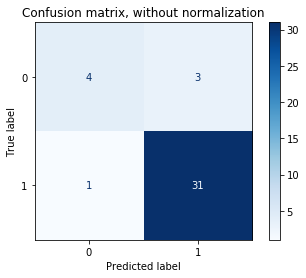

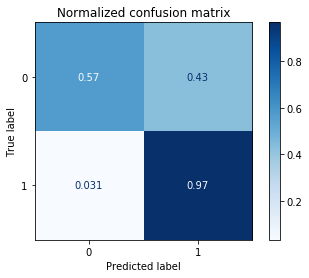

In [16]:
# Plot non-normalized confusion matrix
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(classifier, x_test, y_test,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

This means that using the Logistic Regression Model, 35 predictions were correct whereas 4 predictions were incorrect

* Print the <b>classification report</b>

In [17]:
print(classification_report(y_test,preds))

              precision    recall  f1-score   support

           0       0.80      0.57      0.67         7
           1       0.91      0.97      0.94        32

    accuracy                           0.90        39
   macro avg       0.86      0.77      0.80        39
weighted avg       0.89      0.90      0.89        39



* Print the <b>accuracy</b>

In [18]:
print('Accuracy:',accuracy_score(y_test.tolist(), preds.tolist())*100)
# compared between the predicted results and the actual results.

Accuracy: 89.74358974358975


Thus it can be concluded from the following that the accuracy is about 89.74 % .
